In [1]:
pip install azure-storage-blob

In [2]:
from azure.storage.blob import BlobServiceClient

# Your Azure Blob Storage account name and account key
account_name = 'ilab9788543873'
account_key = 'TAyrrfaiCQ86vkgSXyStufowrMVdk4T45mVw6TNcFFJocR6pTXy6ZMSUUTeeh5FpNTsBVAbVqdwk+AStHA3x1g=='

# Connect to your Blob Storage account
blob_service_client = BlobServiceClient(account_url=f"https://ilab9788543873.blob.core.windows.net", credential=account_key)

# Name of the container you want to access
container_name = 'azureml'
container_client = blob_service_client.get_container_client(container_name)

# List all blobs (files) in the container
blobs = container_client.list_blobs()
for blob in blobs:
    print(blob.name)

10k_lens.json
ComputeRecord/dcid.bceb8578-0ea6-4a32-818a-08e431d48e79/compute_record.txt
ExperimentRun/dcid.bceb8578-0ea6-4a32-818a-08e431d48e79/logs/azureml/driver
ExperimentRun/dcid.bceb8578-0ea6-4a32-818a-08e431d48e79/logs/azureml/driver/stderr
ExperimentRun/dcid.bceb8578-0ea6-4a32-818a-08e431d48e79/logs/azureml/driver/stdout
ExperimentRun/dcid.bceb8578-0ea6-4a32-818a-08e431d48e79/logs/azureml/librarymanager/vm-92238893.log
ExperimentRun/dcid.bceb8578-0ea6-4a32-818a-08e431d48e79/logs/azureml/librarymanager/vm-e5612677.log
ExperimentRun/dcid.bceb8578-0ea6-4a32-818a-08e431d48e79/logs/azureml/librarymanager/vm-e8544025.log
ExperimentRun/dcid.bceb8578-0ea6-4a32-818a-08e431d48e79/logs/azureml/livy
output.json


In [3]:
import json
from azure.storage.blob import BlobServiceClient

# Set up the BlobServiceClient with your account info
account_name = 'ilab9788543873'
account_key = 'TAyrrfaiCQ86vkgSXyStufowrMVdk4T45mVw6TNcFFJocR6pTXy6ZMSUUTeeh5FpNTsBVAbVqdwk'

container_name = 'azureml'
blob_name = '10k_lens.json'

blob_service_client = BlobServiceClient(account_url=f"https://{account_name}.blob.core.windows.net", credential=account_key)

# Assuming you've already connected to the blob service client and container client
blob_client = container_client.get_blob_client(blob=blob_name)

# Try to download the blob content
try:
    downloaded_blob = blob_client.download_blob()
    data = downloaded_blob.readall()
    data_str = data.decode('utf-8')
    print("Blob content:", data_str[:1000])  # Print the first 1000 characters of the blob
except Exception as e:
    print("Error occurred:", e)

Blob content: [{"lens_id": "188-042-825-946-495", "jurisdiction": "US", "doc_number": "20230284427", "kind": "A1", "date_published": "2023-09-07", "lang": "en", "biblio": {"publication_reference": {"jurisdiction": "US", "doc_number": "20230284427", "kind": "A1", "date": "2023-09-07"}, "application_reference": {"jurisdiction": "US", "doc_number": "17686241", "date": "2022-03-03"}, "priority_claims": {}, "invention_title": [{"text": "SRAM WITH P-TYPE ACCESS TRANSISTORS AND COMPLEMENTARY FIELD-EFFECT TRANSISTOR TECHNOLOGY"}], "parties": {"applicants": [{"extracted_name": {"value": "Intel Corporation"}}], "inventors": [{"extracted_name": {"value": "Charles AUGUSTINE"}}, {"extracted_name": {"value": "Seenivasan SUBRAMANIAM"}}, {"extracted_name": {"value": "Patrick MORROW"}}, {"extracted_name": {"value": "Muhammad M. KHELLAH"}}]}, "classifications_cpc": {"classifications": [{"symbol": "H01L27/1104"}, {"symbol": "G11C11/412"}, {"symbol": "G11C11/419"}]}, "cited_by": {}}, "legal_status": {"pat

In [4]:
import pandas as pd
import json

# Convert the JSON string to a list of dictionaries
data_list = json.loads(data_str)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data_list)

# Display the first row
print(df.iloc[0])

# Identify columns with nested data
nested_cols = [col for col in df.columns if isinstance(df[col].iloc[0], (dict, list))]
print("\nNested columns:", nested_cols)

lens_id                                         188-042-825-946-495
jurisdiction                                                     US
doc_number                                              20230284427
kind                                                             A1
date_published                                           2023-09-07
lang                                                             en
biblio            {'publication_reference': {'jurisdiction': 'US...
legal_status                           {'patent_status': 'UNKNOWN'}
abstract          [{'text': 'Embodiments herein relate to scalin...
claims            [{'claims': [{'claim_text': ['1 . An apparatus...
description       {'text': 'FIELD The present application genera...
Name: 0, dtype: object

Nested columns: ['biblio', 'legal_status', 'abstract', 'claims', 'description']


In [5]:
def unnest_dataframe(df):
    """
    Recursively unnest columns with dictionary type until no more such columns exist.
    """
    while any(df[col].apply(lambda x: isinstance(x, dict)).any() for col in df):
        for column in df.columns:
            if df[column].apply(lambda x: isinstance(x, dict)).any():
                # Unnest the column
                temp_df = df[column].apply(pd.Series)
                temp_df.columns = [f"{column}_{subcol}" for subcol in temp_df.columns]

                # Drop the original column and concat the new columns
                df = df.drop(column, axis=1)
                df = pd.concat([df, temp_df], axis=1)

    return df

# Apply the function to the DataFrame
df = unnest_dataframe(df)

Streaming output truncated to the last 5000 lines.
<ipython-input-5-7ab2db456f78>:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp_df = df[column].apply(pd.Series)
<ipython-input-5-7ab2db456f78>:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp_df = df[column].apply(pd.Series)
<ipython-input-5-7ab2db456f78>:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp_df = df[column].apply(pd.Series)
<ipython-input-5-7ab2db456f78>:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp_df = df[column].apply(pd.Series)
<ipython-

In [6]:
# Display the first row again to see the changes
print(df.iloc[0])

lens_id                                                                     188-042-825-946-495
jurisdiction                                                                                 US
doc_number                                                                          20230284427
kind                                                                                         A1
date_published                                                                       2023-09-07
lang                                                                                         en
abstract                                      [{'text': 'Embodiments herein relate to scalin...
claims                                        [{'claims': [{'claim_text': ['1 . An apparatus...
biblio_invention_title                        [{'text': 'SRAM WITH P-TYPE ACCESS TRANSISTORS...
legal_status_patent_status                                                              UNKNOWN
legal_status_granted                    

In [7]:
# Define a function to concatenate all texts from a list of dictionaries with 'text' key
def concatenate_texts_from_list(data):
    texts = []
    if isinstance(data, list):
        for item in data:
            if isinstance(item, dict) and 'text' in item:
                texts.append(item['text'])
    return ' '.join(texts)

# Identify columns with lists that contain dictionaries with a 'text' key
columns_with_text_list = ['abstract', 'biblio_invention_title']

# Concatenate texts for the identified columns
for col in columns_with_text_list:
    new_col_name = f"{col}_text"
    df[new_col_name] = df[col].apply(concatenate_texts_from_list)

# For 'claims' column, extract all claim texts and concatenate them
def concatenate_all_claim_texts(claims):
    claim_texts = []
    if isinstance(claims, list):
        for claim in claims:
            if isinstance(claim, dict) and 'claims' in claim:
                for sub_claim in claim['claims']:
                    if isinstance(sub_claim, dict) and 'claim_text' in sub_claim:
                        claim_texts.extend(sub_claim['claim_text'])
    return ' '.join(claim_texts)

df['all_claim_texts'] = df['claims'].apply(concatenate_all_claim_texts)

In [8]:
# Define a function to extract 'value' from 'extracted_name' key in a list of dictionaries
def extract_values_from_extracted_name(data):
    values = []
    if isinstance(data, list):
        for item in data:
            if isinstance(item, dict) and 'extracted_name' in item and 'value' in item['extracted_name']:
                values.append(item['extracted_name']['value'])
    return ', '.join(values)

# List of columns to apply the above function
cols_to_extract = ['biblio_parties_applicants', 'biblio_parties_inventors']

# Apply the function to the columns
for col in cols_to_extract:
    new_col_name = f"{col}_names"
    df[new_col_name] = df[col].apply(extract_values_from_extracted_name)

In [9]:
# Extract 'symbol' values from each dictionary in the list and join them into a single string
df['biblio_classifications_cpc_symbols'] = df['biblio_classifications_cpc_classifications'].apply(lambda x: ', '.join([i['symbol'] for i in x]) if isinstance(x, list) else None)

In [20]:
# List of columns to drop
cols_to_drop = ['abstract', 'claims', 'biblio_invention_title', 'biblio_parties_applicants', 'biblio_parties_inventors', 'biblio_classifications_cpc_classifications']

# Drop columns
df = df.drop(columns=cols_to_drop, errors='ignore')

In [21]:
# Display the first row again to see the changes
print(df.iloc[0])

lens_id                                                                     188-042-825-946-495
jurisdiction                                                                                 US
doc_number                                                                          20230284427
kind                                                                                         A1
date_published                                                                       2023-09-07
lang                                                                                         en
legal_status_patent_status                                                              UNKNOWN
legal_status_granted                                                                        NaN
legal_status_grant_date                                                                     NaN
description_text                              FIELD The present application generally relate...
description_0                           

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   lens_id                                     10000 non-null  object 
 1   jurisdiction                                10000 non-null  object 
 2   doc_number                                  10000 non-null  object 
 3   kind                                        10000 non-null  object 
 4   date_published                              10000 non-null  object 
 5   lang                                        10000 non-null  object 
 6   legal_status_patent_status                  10000 non-null  object 
 7   legal_status_granted                        3669 non-null   object 
 8   legal_status_grant_date                     3645 non-null   object 
 9   description_text                            1959 non-null   object 
 10  description

Pending Patents

In [ ]:
# Iterate through patents and print their patent_status values
for index, row in df.iterrows():
    patent_status = row['legal_status_patent_status']
    if patent_status.lower() == "pending":
        print(f"Patent Status: {patent_status}")

In [25]:
pending_count = df[df['legal_status_patent_status'].str.lower() == 'pending'].shape[0]

print(f"Total Pending Patents: {pending_count}")

Total Pending Patents: 5990


In [26]:
import pandas as pd
pending_counts_by_jurisdiction = df[df['legal_status_patent_status'].str.lower() == 'pending']\
    .groupby('jurisdiction').size().reset_index(name='pending_count')

# Display the pending counts by jurisdiction
print(pending_counts_by_jurisdiction)

   jurisdiction  pending_count
0            AU             52
1            CA             36
2            CN           4198
3            CR              2
4            EP            308
5            ES              1
6            FI              4
7            GB             34
8            GR              1
9            HU              4
10           IL             21
11           JP             20
12           KR            247
13           LT              1
14           NL              3
15           PL             16
16           PT              2
17           RO             11
18           TW             31
19           US            636
20           WO            362


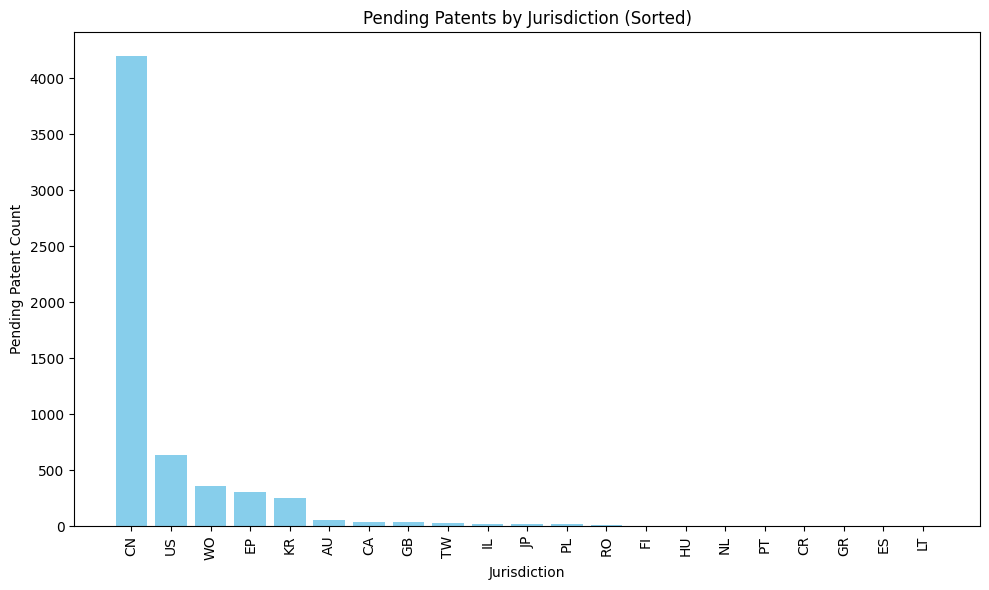

In [27]:
import matplotlib.pyplot as plt
# Sort the DataFrame by 'pending_count' in descending order
sorted_pending_counts = pending_counts_by_jurisdiction.sort_values(by='pending_count', ascending=False)

# Extract jurisdiction names and counts for plotting
jurisdictions = sorted_pending_counts['jurisdiction']
counts = sorted_pending_counts['pending_count']

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(jurisdictions, counts, color='skyblue')
plt.xlabel('Jurisdiction')
plt.ylabel('Pending Patent Count')
plt.title('Pending Patents by Jurisdiction (Sorted)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Display the bar graph
plt.tight_layout()
plt.show()

Top patents cited by others

In [28]:
import pandas as pd

# Count patents cited by others
cited_by_others_count = df[df['biblio_cited_by_patent_count'] > 0].shape[0]

# Print the count
print(f"Number of Patents Cited by Others: {cited_by_others_count}")

Number of Patents Cited by Others: 435


In [32]:
# Sort the DataFrame by 'biblio_cited_by_patent_count' in descending order
sorted_df = df.sort_values(by='biblio_cited_by_patent_count', ascending=False)

# Select the top 30 patents
top_30_cited_patents = sorted_df.head(30)

# Display only the titles and their counts
top_30_titles_and_counts = top_30_cited_patents[['biblio_invention_title_text', 'jurisdiction', 'biblio_cited_by_patent_count']]

# Print the top 30 titles and counts
print(top_30_titles_and_counts)

                            biblio_invention_title_text jurisdiction  \
9135  EDGE COMPUTING TECHNOLOGIES FOR TRANSPORT LAYE...           US   
5768  TECHNOLOGIES FOR IMPLEMENTING THE RADIO EQUIPM...           US   
7262  VULNERABLE ROAD USER SAFETY TECHNOLOGIES BASED...           US   
9986  Chromatograph supervision method and device ba...           CN   
7624  TRACKING AND REWARDING HEALTH AND FITNESS ACTI...           US   
6175  Information Technology Environment Organizatio...           US   
3240   MULTI-RADIO ACCESS TECHNOLOGY TRAFFIC MANAGEMENT           US   
8052  Large and medium reservoir safety inspection s...           CN   
4286  Photovoltaic energy optimization regulation an...           CN   
9582  TECHNOLOGIES FOR ENABLING COLLECTIVE PERCEPTIO...           US   
5930  Unmanned aerial vehicle image technology metho...           CN   
9146  UTILIZING A MACHINE LEARNING MODEL TO DETERMIN...           US   
7310  Property digital management system based on cl...         

<ipython-input-34-6956713e05b4>:13: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  plt.tight_layout()
<ipython-input-34-6956713e05b4>:13: UserWarning: Glyph 31181 (\N{CJK UNIFIED IDEOGRAPH-79CD}) missing from current font.
  plt.tight_layout()
<ipython-input-34-6956713e05b4>:13: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from current font.
  plt.tight_layout()
<ipython-input-34-6956713e05b4>:13: UserWarning: Glyph 20110 (\N{CJK UNIFIED IDEOGRAPH-4E8E}) missing from current font.
  plt.tight_layout()
<ipython-input-34-6956713e05b4>:13: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  plt.tight_layout()
<ipython-input-34-6956713e05b4>:13: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.tight_layout()
<ipython-input-34-6956713e05b4>:13: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.
  plt.tight_layout()
<ipyth

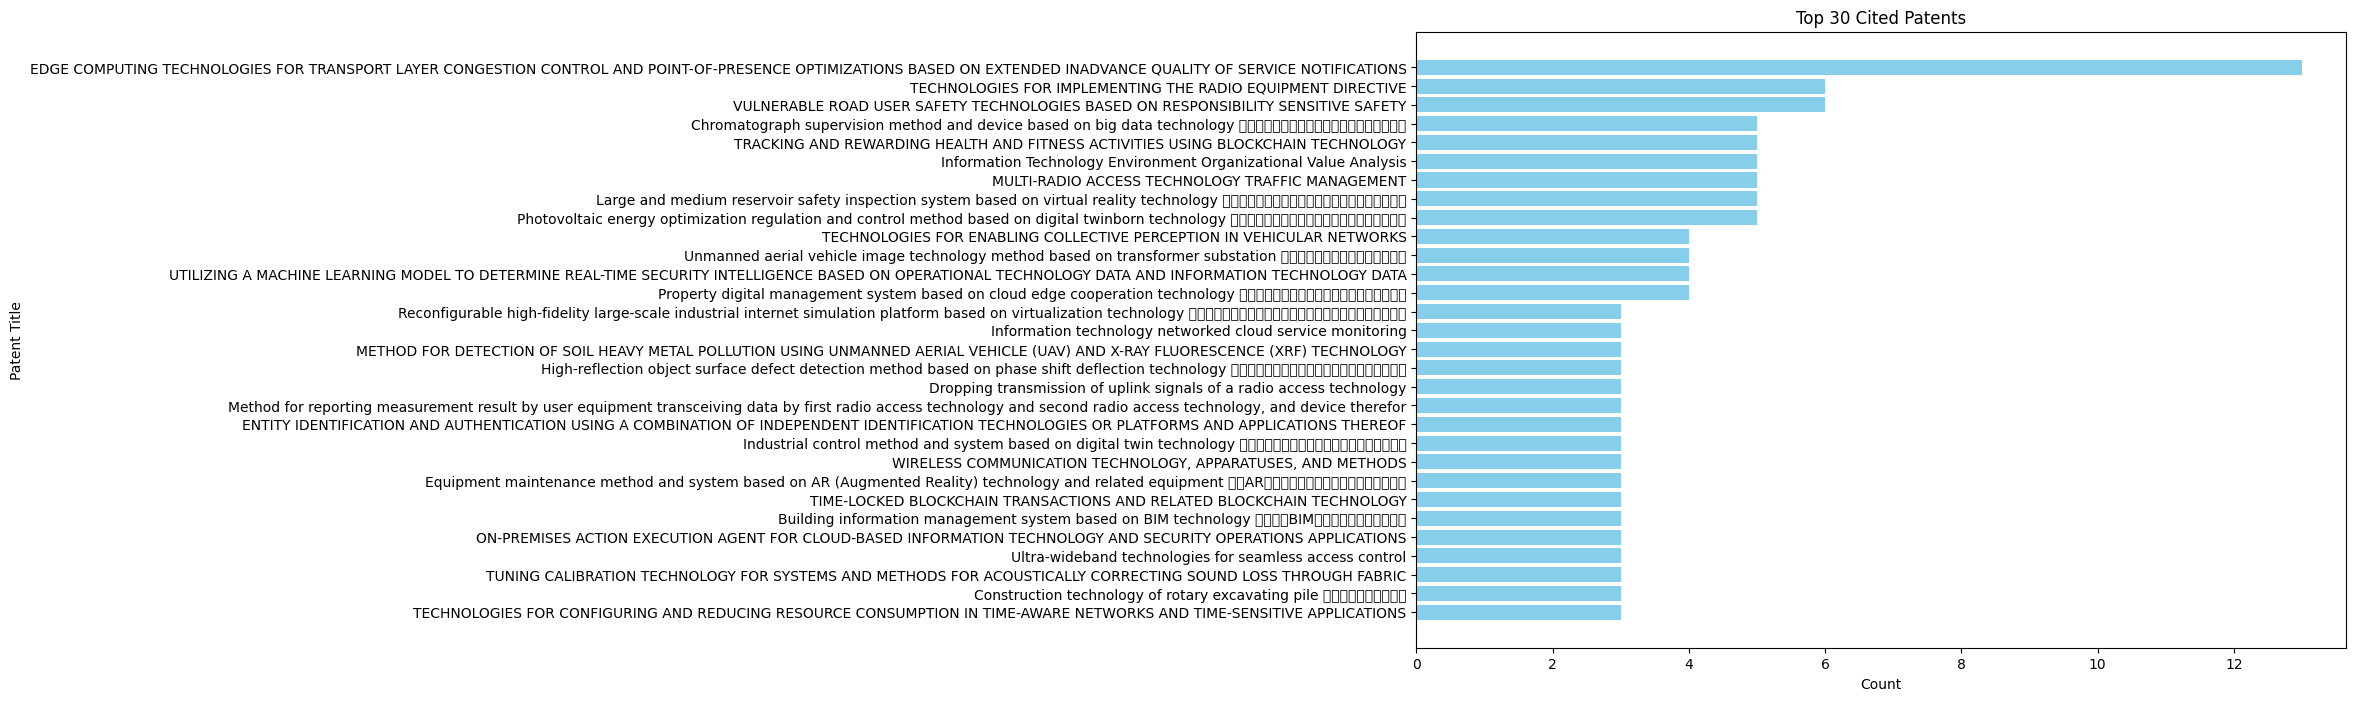

In [34]:
# Display only the titles and their counts
top_30_titles_and_counts = top_30_cited_patents[['biblio_invention_title_text', 'biblio_cited_by_patent_count']]

# Create a bar graph
plt.figure(figsize=(12, 8))
plt.barh(top_30_titles_and_counts['biblio_invention_title_text'], top_30_titles_and_counts['biblio_cited_by_patent_count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Patent Title')
plt.title('Top 30 Cited Patents')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability

# Display the bar graph
plt.tight_layout()
plt.show()